In [1]:
# imports
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# time series data
time_series_url = "https://api.covid19india.org/data.json"
time_response = requests.get(time_series_url)
time_data = json.loads(time_response.text)
time_data_array = time_data["cases_time_series"][-20:]

In [3]:
time_data_array

[{'dailyconfirmed': '25154',
  'dailydeceased': '159',
  'dailyrecovered': '16508',
  'date': '13 March 2021',
  'dateymd': '2021-03-13',
  'totalconfirmed': '11358567',
  'totaldeceased': '158051',
  'totalrecovered': '10987688'},
 {'dailyconfirmed': '26513',
  'dailydeceased': '120',
  'dailyrecovered': '17590',
  'date': '14 March 2021',
  'dateymd': '2021-03-14',
  'totalconfirmed': '11385080',
  'totaldeceased': '158171',
  'totalrecovered': '11005278'},
 {'dailyconfirmed': '24437',
  'dailydeceased': '130',
  'dailyrecovered': '20186',
  'date': '15 March 2021',
  'dateymd': '2021-03-15',
  'totalconfirmed': '11409517',
  'totaldeceased': '158301',
  'totalrecovered': '11025464'},
 {'dailyconfirmed': '28869',
  'dailydeceased': '187',
  'dailyrecovered': '17746',
  'date': '16 March 2021',
  'dateymd': '2021-03-16',
  'totalconfirmed': '11438386',
  'totaldeceased': '158488',
  'totalrecovered': '11043210'},
 {'dailyconfirmed': '35838',
  'dailydeceased': '171',
  'dailyrecovered

In [4]:
confirm = []
deceased = []
recovered = []
date = []

for data in time_data_array:
    confirm.append(int(data["dailyconfirmed"]))
    deceased.append(int(data["dailydeceased"]))
    recovered.append(int(data["dailyrecovered"]))
    date.append(data["date"])

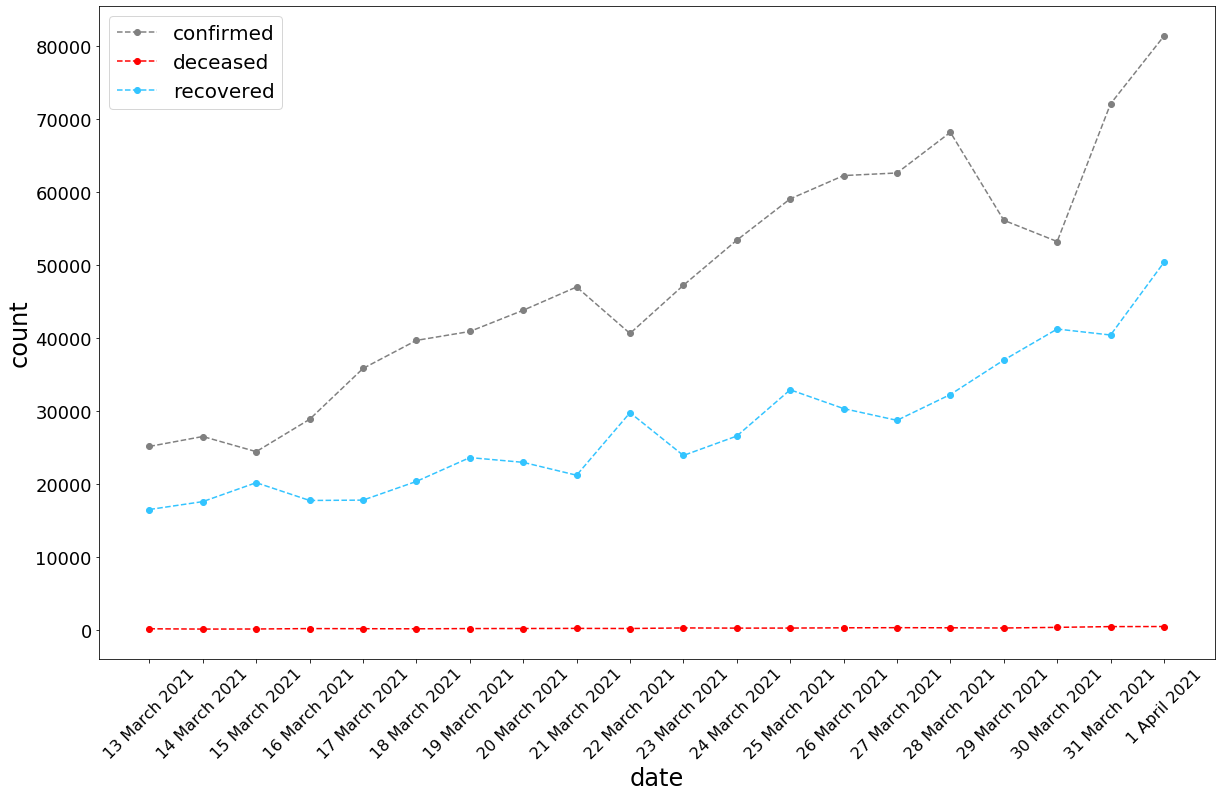

In [5]:
plt.figure(figsize=(20,12))

plt.plot(date,confirm,label="confirmed", linestyle="--", marker='o',color="grey")
plt.plot(date,deceased,label="deceased",linestyle="--", marker='o',color="red")
plt.plot(date,recovered,label="recovered",linestyle="--", marker='o',color="#33C4FF")
plt.xlabel("date",fontsize=24)
plt.ylabel("count",fontsize=24)
plt.legend(prop={'size': 20},loc="upper left")
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=18)
plt.show()

In [6]:
# cases distribution data
state_level_url = "https://api.covid19india.org/v4/data.json"

In [7]:
state_level_response = requests.get(state_level_url)

In [8]:
state_level_data = json.loads(state_level_response.text)

In [9]:
state_name = []
state_confirmed = []
state_deceased = []
state_recovered = []
state_tested = []

In [10]:
for state in state_level_data:
    if state != "TT":
        state_name.append(state)
        state_confirmed.append(state_level_data[state]['total']['confirmed'])
        try:
            state_deceased.append(state_level_data[state]['total']['deceased'])
        except:
            state_deceased.append(0)
        state_recovered.append(state_level_data[state]['total']['recovered'])
        state_tested.append(state_level_data[state]['total']['tested'])

In [11]:
state_dict = {"state":state_name,"confirmed":state_confirmed,"recovered":state_recovered,"deceased":state_deceased,"tested":state_tested}

In [12]:
state_df = pd.DataFrame(state_dict)

In [13]:
state_df["under_treatment"] =  state_df["confirmed"] - (state_df["recovered"] + state_df["deceased"])

In [14]:
state_df

,state,confirmed,recovered,deceased,tested,under_treatment
0,AN,5084,4980,62,319864,42
1,AP,903260,887898,7220,15114988,8142
2,AR,16845,16785,56,414169,4
3,AS,218470,215479,1107,7243652,1884
4,BR,266015,262529,1578,23761732,1908
5,CH,27256,23925,380,313935,2951
6,CT,353804,320613,4204,5798665,28987
7,DL,665220,643686,11036,14653735,10498
8,DN,3651,3442,2,72410,207
9,GA,58304,55757,831,547263,1716


In [15]:
total = state_df[["recovered","deceased","under_treatment"]].sum()

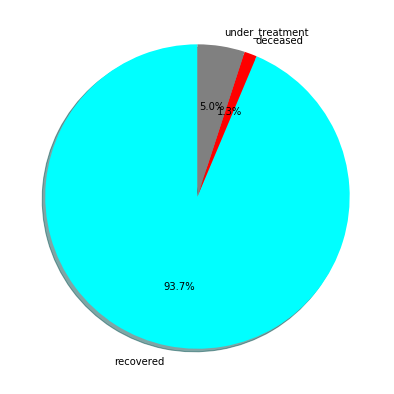

In [16]:
plt.figure(figsize=(7,7))
plt.pie(total.values, labels=total.index, autopct="%1.1f%%",shadow=True,startangle=90,colors=["cyan","red","grey"])
plt.show()